In [10]:
from utils import *

In [5]:
import pandas as pd

In [1]:
API_key = "api_key"

In [2]:
from googleapiclient.discovery import build

In [3]:
# I'll use 3 youtube channels 
channelsIDs = ["UCAuUUnT6oDeKwE6v1NGQxug",
              "UCi9oRLva2ADWc1QcwthYgSQ",
              "UC68TLK0mAEzUyHx5x5k-S1Q"
              ]

In [4]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(api_service_name,
                api_version,
                developerKey=API_key)

In [7]:
df = get_channels_data(youtube, channelsIDs)

In [8]:
df

,channelName,playlist_ID,subscibes,total_Videos,views
0,Jeff Nippard,UU68TLK0mAEzUyHx5x5k-S1Q,3100000,437,337193521
1,Mohammed Alnhet,UUi9oRLva2ADWc1QcwthYgSQ,1260000,303,87019516
2,TED,UUAuUUnT6oDeKwE6v1NGQxug,21200000,3934,2311326151


In [10]:
playlistIds = df["playlist_ID"].tolist()

# TED Channel

In [17]:
data = get_videos_data(youtube, playlistIds[2])

In [18]:
df_ted = transform_to(data)

In [20]:
df_ted

,channelTitle,commentCount,duration,favoriteCount,likeCount,publishedAt,tags,title,viewCount
0,TED,323,PT8M51S,0,590,2022-05-06T11:00:37Z,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",An Election Redesign to Restore Trust in US De...,21642
1,TED,145,PT8M12S,0,N.A,2022-05-05T11:00:32Z,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",Mental Health Care That Disrupts Cycles of Vio...,27604
2,TED,152,PT8M58S,0,619,2022-05-04T11:00:27Z,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",Why Indigenous Forest Guardianship is Crucial ...,20099
3,TED,208,PT8M17S,0,N.A,2022-05-04T11:00:23Z,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",How Ancient Arctic Carbon Threatens Everyone o...,39952
4,TED,94,PT11M14S,0,561,2022-05-02T14:59:57Z,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",A Safe Pathway to Resettlement for Migrants an...,25391
5,TED,199,PT8M16S,0,N.A,2022-04-29T18:37:26Z,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",How Webtoons Are Changing Movies and TV | Hyeo...,65105
6,TED,198,PT16M16S,0,N.A,2022-04-28T13:32:57Z,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED]",Why All Melodies Should Be Free for Musicians ...,37656
7,TED,82,PT10M16S,0,N.A,2022-04-27T13:50:47Z,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED]",Powerful Photos That Honor the Lives of Overlo...,27486
8,TED,278,PT9M14S,0,N.A,2022-04-26T13:29:35Z,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...","Goats, Blockchain and the Future of Money | Fa...",69163
9,TED,762,PT8M48S,0,9782,2022-04-25T18:09:41Z,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",How the James Webb Space Telescope Will Unfold...,318159


# EDA

In [21]:
df_ted["likeCount"].loc[df_ted.likeCount == "N.A"] = 0
df_ted["commentCount"].loc[df_ted.commentCount == "N.A"] = 0

In [22]:
df_ted[["commentCount", "likeCount", "viewCount"]] = df_ted[["commentCount", "likeCount", "viewCount"]].apply(pd.to_numeric, axis=1)

In [23]:
import isodate
df_ted["durationSec"] = df_ted["duration"].apply(lambda x: isodate.parse_duration(x).total_seconds())

In [24]:
df_ted[["durationSec"]] = df_ted[["durationSec"]].astype(dtype='int64')

In [25]:
df_ted["publishedAt"] = pd.to_datetime(df_ted["publishedAt"])

In [26]:
df_ted["date_pub"] = df_ted["publishedAt"].apply(lambda x : x.date())
df_ted["time_pub"] = df_ted["publishedAt"].apply(lambda x : x.time())

In [27]:
df_ted.drop(columns=["favoriteCount", "duration", "publishedAt"], inplace=True)

In [29]:
df_ted["year"] = df_ted["date_pub"].apply(lambda x: x.year)

In [30]:
df_ted.sample(5)

,channelTitle,commentCount,likeCount,tags,title,viewCount,durationSec,date_pub,time_pub,year
2282,TED,75,1429,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",The world's largest family reunion ... we're a...,100560,586,2014-06-13,16:15:39,2014
1278,TED,112,829,"[TEDTalk, TEDTalks, social change, community, ...",The human stories behind mass incarceration | ...,44201,820,2018-04-17,02:48:21,2018
3113,TED,201,710,"[Van, Jones, TEDTalks, TED, talks, TEDx, TEDxG...",The economic injustice of plastic | Van Jones,51141,800,2011-01-21,18:07:32,2011
1408,TED,139,1937,"[TEDTalk, TEDTalks, Brazil, Cities, Climate Ch...",The biggest risks facing cities -- and some so...,101843,1031,2017-11-30,21:09:33,2017
1923,TED,89,2790,"[TED Talk, TED Talks, Cesar Harada, Harbour Sc...",How I Teach Kids to Love Science | Cesar Harad...,142887,589,2015-11-18,16:49:39,2015


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

## Best 10 videos by view count

Text(0, 0.5, 'Views')

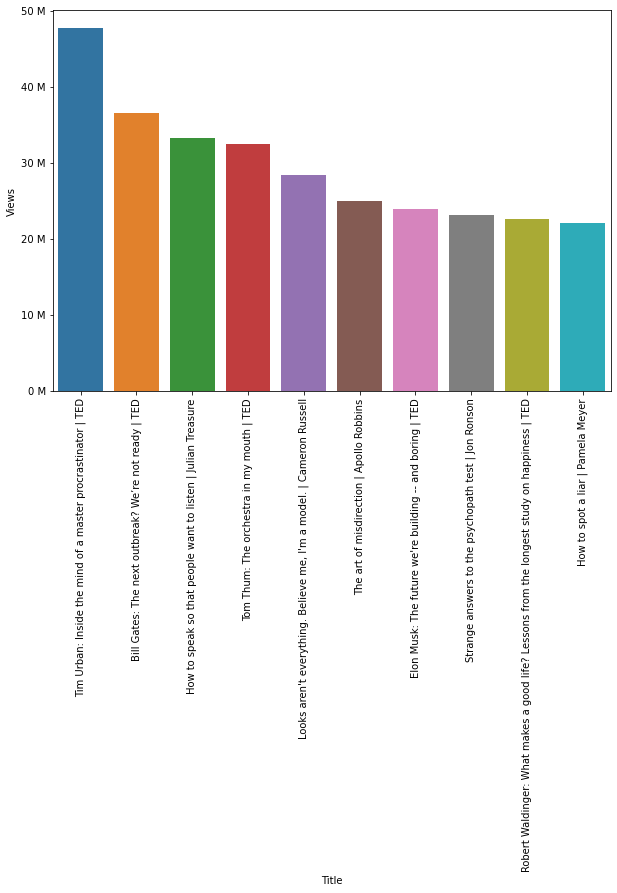

In [36]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x = "title", y = "viewCount", data=df_ted.sort_values(by="viewCount", ascending=False)[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, p: '{:,.0f} M'.format(x/1000000)))
ax.set_xlabel("Title")
ax.set_ylabel("Views")

# Worst 10 videos

Text(0, 0.5, 'Views')

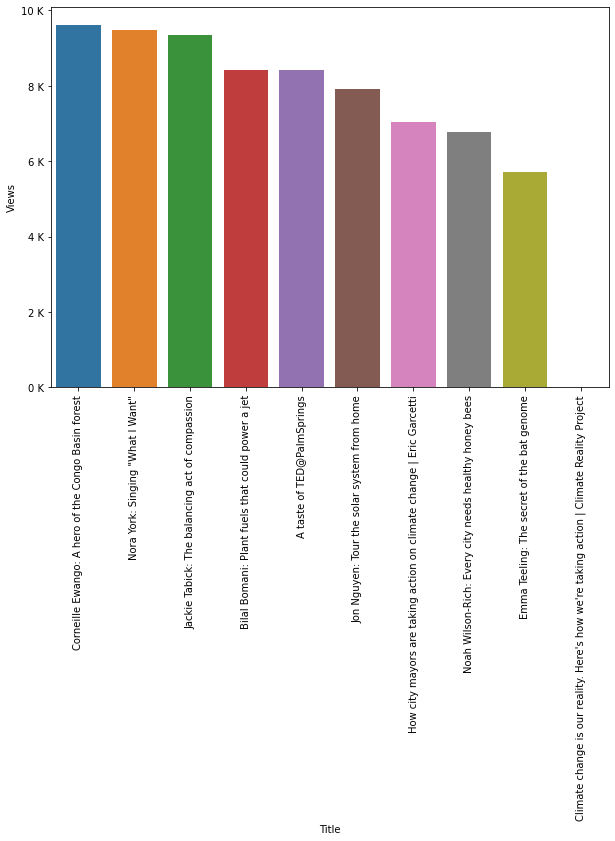

In [43]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x = "title", y = "viewCount", data=df_ted.sort_values(by="viewCount", ascending=False)[-10:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, p: '{:,.0f} K'.format(x/1000)))
ax.set_xlabel("Title")
ax.set_ylabel("Views")

## Top 10 videos by like count

Text(0, 0.5, 'Likes')

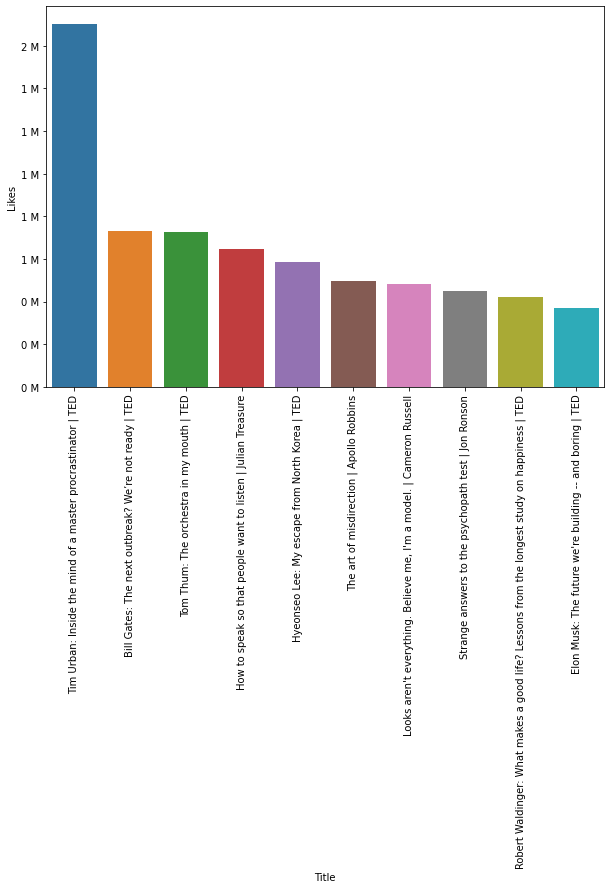

In [44]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x = "title", y = "likeCount", data=df_ted.sort_values(by="likeCount", ascending=False)[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, p: '{:,.0f} M'.format(x/1000000)))
ax.set_xlabel("Title")
ax.set_ylabel("Likes")

## Top 10 videos by comment count

Text(0, 0.5, 'Comments')

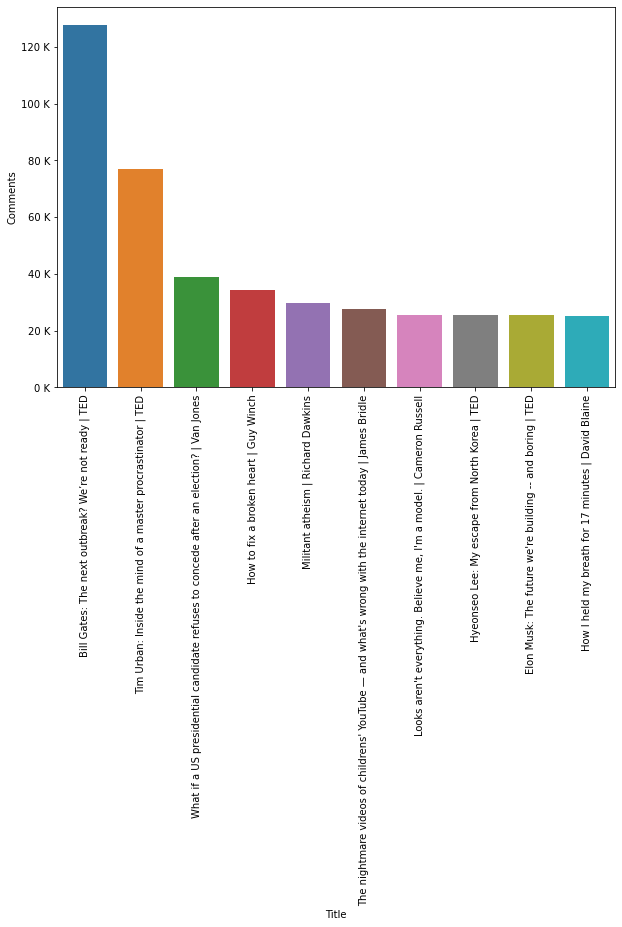

In [45]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x = "title", y = "commentCount", data=df_ted.sort_values(by="commentCount", ascending=False)[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, p: '{:,.0f} K'.format(x/1000)))
ax.set_xlabel("Title")
ax.set_ylabel("Comments")

# Top 5 longest video

In [109]:
import matplotlib.gridspec as gridspec

Text(0, 0.5, 'Duration (min)')

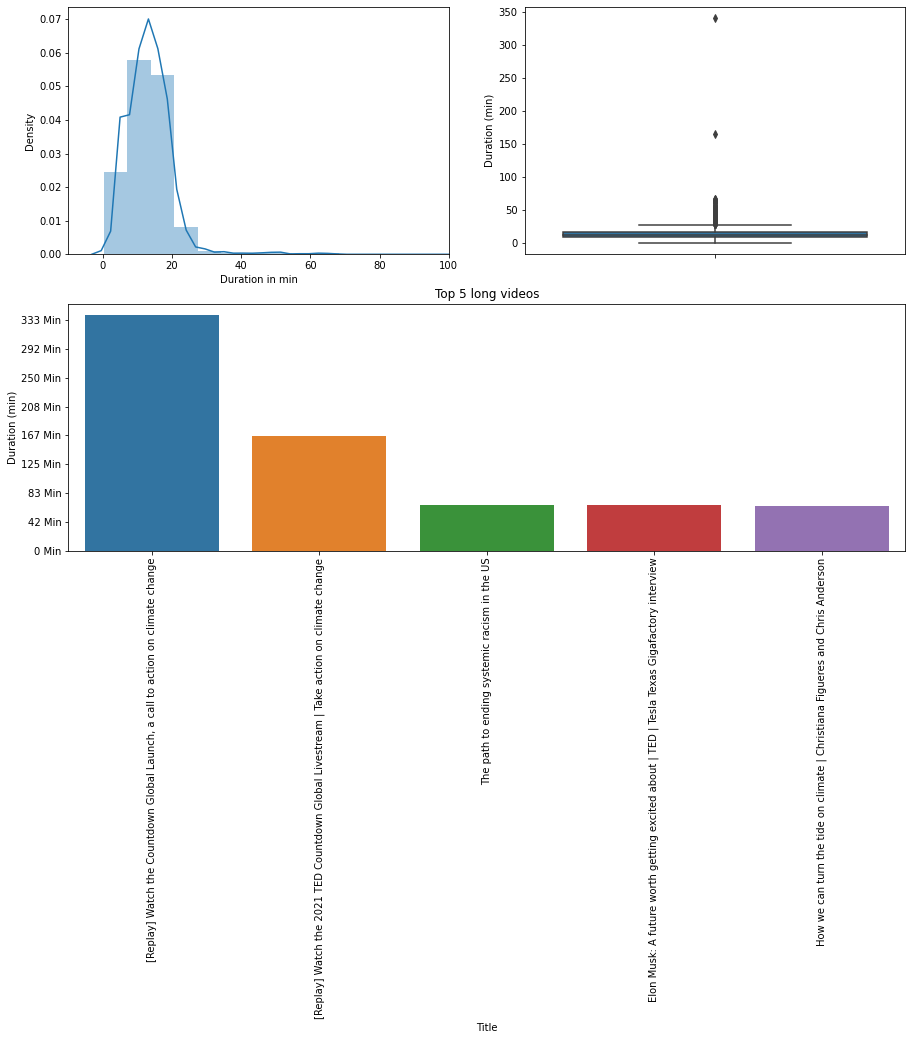

In [119]:
# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0
sns.distributions.distplot(df_ted['durationSec']/60, hist=True, ax=ax1)
plt.xlim(-10, 100)
ax1.set_xlabel("Duration in min")
ax1.set_ylabel("Density")

ax2 = plt.subplot(gs[0, 1]) # row 0, col 1
sns.boxplot(y=df_ted['durationSec']/60, ax=ax2)
ax2.set_ylabel("Duration (min)")

ax3 = plt.subplot(gs[1, :]) # row 1, span all columns
sns.barplot(x = "title", y = "durationSec", data=df_ted.sort_values(by="durationSec", ascending=False)[:5], ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, p: '{:,.00f} Min'.format(x/60)))
ax3.set_xlabel("Title")
ax3.set_title("Top 5 long videos")
ax3.set_ylabel("Duration (min)")

# Corrolation

In [121]:
import numpy as np

In [122]:
corrolation = df_ted[["viewCount", "likeCount", "commentCount", "durationSec"]].corr()
musk = np.zeros_like(corrolation)
musk[np.triu_indices_from(musk)] = True
np.fill_diagonal(musk,0)

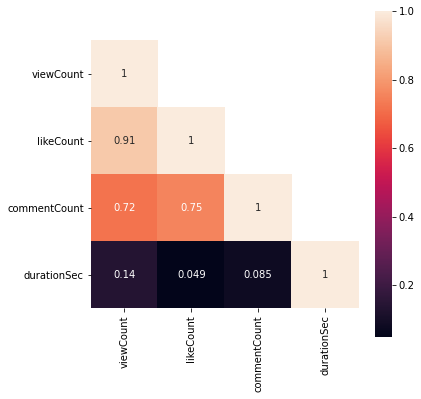

In [123]:
plt.figure(figsize=(6,6))
sns.heatmap(corrolation, annot=True, mask=musk, square=True)

# Topics in TED using tags on videos

In [125]:
ltags = []
for tag in df_ted.tags:
    ltags.extend([t.lower() for t in tag])

In [126]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [128]:
from PIL import Image

(-0.5, 899.5, 899.5, -0.5)

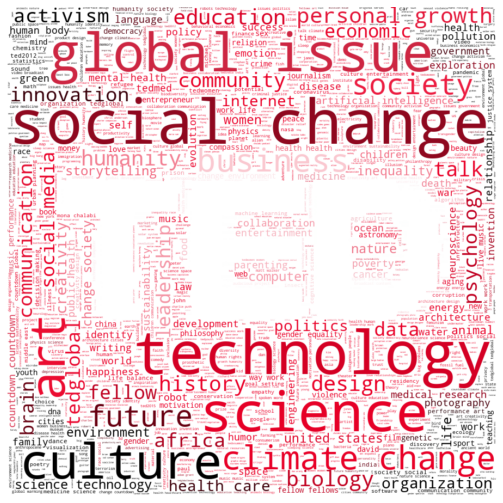

In [138]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["talks", "ted", "ted talk", "ted talks", "tedtalks", "tedtalk","tedx"])

# Generate a word cloud image
ted_mask = np.array(Image.open("ted.jpg"))
wordcloud_ted = WordCloud(stopwords=stopwords, background_color="white",
                          mode="RGBA", max_words=2000,
                          mask=ted_mask).generate(','.join(ltags[:]))

# create coloring from image
image_colors = ImageColorGenerator(ted_mask)
plt.figure(figsize=[9,9])
plt.imshow(wordcloud_ted.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("tedWC1.png", format="png")

#plt.show()

In [141]:
df_ted

,channelTitle,commentCount,likeCount,tags,title,viewCount,durationSec,date_pub,time_pub,year
0,TED,323,590,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",An Election Redesign to Restore Trust in US De...,21642,531,2022-05-06,11:00:37,2022
1,TED,145,0,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",Mental Health Care That Disrupts Cycles of Vio...,27604,492,2022-05-05,11:00:32,2022
2,TED,152,619,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",Why Indigenous Forest Guardianship is Crucial ...,20099,538,2022-05-04,11:00:27,2022
3,TED,208,0,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",How Ancient Arctic Carbon Threatens Everyone o...,39952,497,2022-05-04,11:00:23,2022
4,TED,94,561,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",A Safe Pathway to Resettlement for Migrants an...,25391,674,2022-05-02,14:59:57,2022
5,TED,199,0,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",How Webtoons Are Changing Movies and TV | Hyeo...,65105,496,2022-04-29,18:37:26,2022
6,TED,198,0,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED]",Why All Melodies Should Be Free for Musicians ...,37656,976,2022-04-28,13:32:57,2022
7,TED,82,0,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED]",Powerful Photos That Honor the Lives of Overlo...,27486,616,2022-04-27,13:50:47,2022
8,TED,278,0,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...","Goats, Blockchain and the Future of Money | Fa...",69163,554,2022-04-26,13:29:35,2022
9,TED,762,9782,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",How the James Webb Space Telescope Will Unfold...,318159,528,2022-04-25,18:09:41,2022


In [142]:
df_ted.to_csv("ted_data.csv")
df.to_csv("ychannel_data.csv")

# Dashboard with Power bi

In [7]:
from IPython.display import IFrame

In [9]:
pbireport = "https://app.powerbi.com/reportEmbed?reportId=36b821ca-03ec-41a7-9547-34771338f11b&autoAuth=true&ctid=dbd6664d-4eb9-46eb-99d8-5c43ba153c61&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLXdlc3QtZXVyb3BlLXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9"
IFrame(pbireport, width=1000, height=600)

In [13]:
import jovian

In [16]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "zidani-houssem1/youtubeapi" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/zidani-houssem1/youtubeapi


'https://jovian.ml/zidani-houssem1/youtubeapi'